# Storytelling

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from millify import millify
import matplotlib.patches as mpatches
import seaborn as sns

In [13]:
data = pd.read_csv('data\clean_data.csv')

In [14]:
data.head()

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO,EXPENSE
0,2022,1,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",004.948.028-63,GILBERTO PISELO DO NASCIMENTO,001/22,03/01/2022,Despesa com pagamento de aluguel de imóvel par...,6000.0,2173614,"Lease of properties for political office, incl..."
1,2022,1,ACIR GURGACZ,Divulgação da atividade parlamentar,26.320.603/0001-64,INFORMANAHORA,000000000000310/A,04/01/2022,Despesa com divulgação da atividade parlamenta...,1500.0,2173615,Publication of parliamentary activity
2,2022,1,ACIR GURGACZ,Divulgação da atividade parlamentar,13.659.201/0001-47,LINHA PURPURA FOTO E VIDEO LTDA,107,14/01/2022,Despesa com produção de texto e edição de víde...,6000.0,2173616,Publication of parliamentary activity
3,2022,1,ACIR GURGACZ,Divulgação da atividade parlamentar,23.652.846/0001-01,ROBERTO GUTIERREZ DA ROCHA M.E.I.,187,18/01/2022,Divulgação da atividade parlamentar,1000.0,2173618,Publication of parliamentary activity
4,2022,1,ACIR GURGACZ,Divulgação da atividade parlamentar,08.941.827/0001-01,RONDONIA DINÂMICA COM. E SERV. DE INFORMÁTICA ...,000000000001772/A,17/01/2022,Divulgação da atividade parlamentar,2000.0,2173617,Publication of parliamentary activity


In [15]:
def add_value_labels(ax, spacing=5, bar='h'):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        if bar == 'h':
            y_value = rect.get_height()
            x_value = rect.get_x() + rect.get_width() / 2
        elif bar == 'v':
            x_value = rect.get_width()
            y_value = rect.get_y() + rect.get_height() / 2
        
        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        if bar == 'h':
            va = 'bottom'
            # If value of bar is negative: Place label below bar
            if y_value < 0:
                # Invert space to place label below
                space *= -1
                # Vertically align label at top
                va = 'top'
                # Use Y value as label and format number with two decimal places and Millify to be readable
            label = millify(y_value, precision=2)

            # Create annotation
            ax.annotate(
                label,                      # Use `label` as label
                (x_value, y_value),         # Place label at end of the bar
                xytext=(0, space),          # Vertically shift label by `space`
                textcoords="offset points", # Interpret `xytext` as offset in points
                ha='center',                # Horizontally center label
                va=va)                      # Vertically align label differently for
                                            # positive and negative values.
        elif bar == 'v':
            ha = 'left'
            
            if x_value < 0:
                space *= -1
                va = 'top'
            label = millify(x_value, precision=2)
            
            ax.annotate(
                label,
                (x_value, y_value),
                xytext=(space, 0),
                textcoords='offset points',
                ha=ha,
                va='center')

    

        

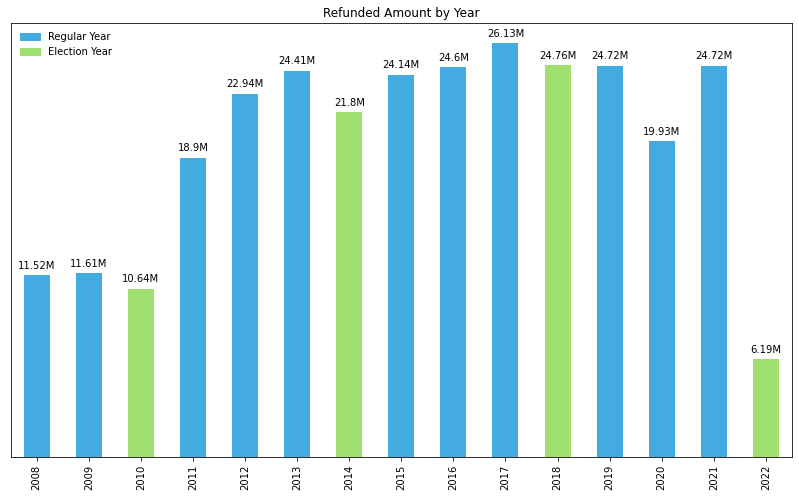

In [16]:
plt.figure(figsize=(14, 8))
colors = ['#43ABE0', '#43ABE0', '#9FE070', '#43ABE0', '#43ABE0', '#43ABE0', '#9FE070',
          '#43ABE0', '#43ABE0', '#43ABE0', '#9FE070', '#43ABE0', '#43ABE0', '#43ABE0',
          '#9FE070']
ax = data.groupby('ANO').VALOR_REEMBOLSADO.sum().plot(kind = 'bar', color = colors)
normal_year = mpatches.Patch(color='#43ABE0', label='Regular Year')
election_year = mpatches.Patch(color='#9FE070', label='Election Year')
ax.legend(handles=[normal_year, election_year], frameon=False, loc=2)
ax.set_title('Refunded Amount by Year')
ax.set(xlabel = None)
ax.axes.get_yaxis().set_visible(False)
add_value_labels(ax)
plt.savefig('img\\refunded_year.jpg', bbox_inches = 'tight')

<Figure size 576x1008 with 0 Axes>

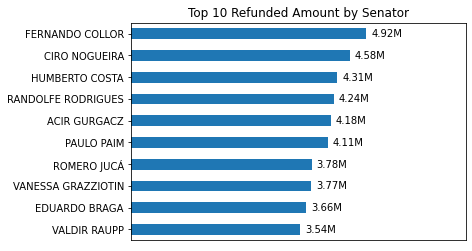

In [17]:
plt.figure(figsize=(8, 14))
ax = data.groupby('SENADOR').VALOR_REEMBOLSADO.sum().reset_index()
ax = ax.sort_values('VALOR_REEMBOLSADO',
                    ascending = False).head(10).sort_values('VALOR_REEMBOLSADO', 
                                                            ascending = True).plot(kind = 'barh',
                                                                                   x = 'SENADOR',
                                                                                   y = 'VALOR_REEMBOLSADO')
ax.set_title('Top 10 Refunded Amount by Senator')
ax.set(ylabel = None)
ax.get_legend().remove()
ax.axes.get_xaxis().set_visible(False)
add_value_labels(ax, bar = 'v')
plt.xlim(0, 7000000)
plt.savefig('img\\senator_year.jpg',bbox_inches = 'tight')

In [18]:
quota_percentage = pd.read_csv('data\quota_percentage.csv')

<Figure size 576x1008 with 0 Axes>

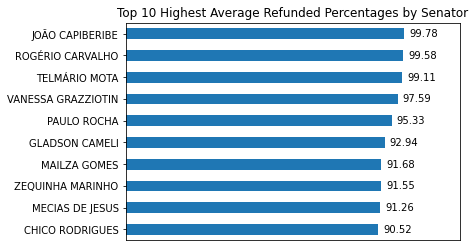

In [19]:
plt.figure(figsize=(8, 14))
ax = quota_percentage.groupby(['SENADOR']).PERCENTAGE.mean().reset_index()
ax = ax.sort_values('PERCENTAGE',
                    ascending = False).head(10).sort_values('PERCENTAGE', 
                                                            ascending = True).plot(kind = 'barh',
                                                                                   x = 'SENADOR',
                                                                                   y = 'PERCENTAGE')
ax.set_title('Top 10 Highest Average Refunded Percentages by Senator')
ax.set(ylabel = None)
ax.get_legend().remove()
ax.axes.get_xaxis().set_visible(False)
add_value_labels(ax, bar = 'v')
plt.xlim(0, 120)
plt.savefig('img\\senator_refund_highest_mean.jpg',bbox_inches = 'tight')


<Figure size 576x1008 with 0 Axes>

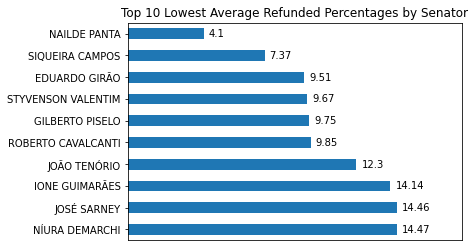

In [20]:
plt.figure(figsize=(8, 14))
ax = quota_percentage.groupby(['SENADOR']).PERCENTAGE.mean().reset_index()
ax = ax.sort_values('PERCENTAGE',
                    ascending = True).head(10).sort_values('PERCENTAGE',
                                                           ascending = False).plot(kind = 'barh', 
                                                                                   x = 'SENADOR',
                                                                                   y = 'PERCENTAGE')
ax.set_title('Top 10 Lowest Average Refunded Percentages by Senator')
ax.set(ylabel = None)
ax.get_legend().remove()
ax.axes.get_xaxis().set_visible(False)
add_value_labels(ax, bar = 'v')
plt.xlim(0, 18)
plt.savefig('img\\senator_refund_lowest_mean.jpg',bbox_inches = 'tight')


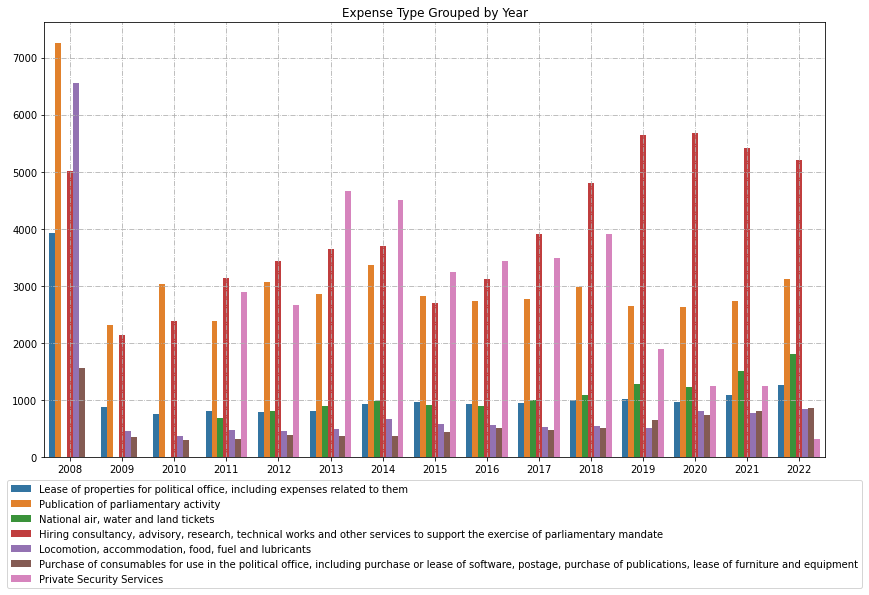

In [21]:
plt.figure(figsize=(14, 8))
ax = sns.barplot(x="ANO", y="VALOR_REEMBOLSADO", hue="EXPENSE", data=data, ci=None)
ax.set(xlabel = None)
ax.set(ylabel = None)
ax.set_title('Expense Type Grouped by Year')
plt.grid(ls='-.')
plt.legend(bbox_to_anchor=(0.5, -0.3), loc='lower center', borderaxespad=0)
plt.savefig('img\\expense_type_year.jpg',bbox_inches = 'tight')

In [22]:
data.head()

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO,EXPENSE
0,2022,1,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",004.948.028-63,GILBERTO PISELO DO NASCIMENTO,001/22,03/01/2022,Despesa com pagamento de aluguel de imóvel par...,6000.0,2173614,"Lease of properties for political office, incl..."
1,2022,1,ACIR GURGACZ,Divulgação da atividade parlamentar,26.320.603/0001-64,INFORMANAHORA,000000000000310/A,04/01/2022,Despesa com divulgação da atividade parlamenta...,1500.0,2173615,Publication of parliamentary activity
2,2022,1,ACIR GURGACZ,Divulgação da atividade parlamentar,13.659.201/0001-47,LINHA PURPURA FOTO E VIDEO LTDA,107,14/01/2022,Despesa com produção de texto e edição de víde...,6000.0,2173616,Publication of parliamentary activity
3,2022,1,ACIR GURGACZ,Divulgação da atividade parlamentar,23.652.846/0001-01,ROBERTO GUTIERREZ DA ROCHA M.E.I.,187,18/01/2022,Divulgação da atividade parlamentar,1000.0,2173618,Publication of parliamentary activity
4,2022,1,ACIR GURGACZ,Divulgação da atividade parlamentar,08.941.827/0001-01,RONDONIA DINÂMICA COM. E SERV. DE INFORMÁTICA ...,000000000001772/A,17/01/2022,Divulgação da atividade parlamentar,2000.0,2173617,Publication of parliamentary activity
